#Homework 3: Midterm Review

##Part A:

###1.Describe the importance of training and test data.  Why do we separate data into these subsets?

Ans: Training data is used to teach the model patterns and relationships; test data is to evaluate how well the model generalizes to new, unseen data
We separate data because: Using the same data for training and testing would give an overly optimistic view of model performance, test data helps detect overfitting.

###2.What is k-fold cross validation and what do we use it for?

Ans: K-fold cross validation is a method where data is split into k equal-sized folds. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. One fold is held out as test data, model trains on remaining k-1 folds, process repeats k times, with each fold serving as validation once and results are averaged across all k iterations.

###3.How is k-fold cross validation different from stratified k-fold cross validation?
Ans: Stratified k-fold maintains the same proportion of samples for each class in every fold while k-fold cross validation splits data randomly without considering class distribution.

###4.Name the 4 types of supervised learning models that we have learned thus far that are used to predict categorical dependent variables like whether an email is labeled “spam” or “not spam.”
Ans: Logistic Regression, Decision Trees, Random Forests, K-Nearest Neighbors

###5.Name the 3 types of supervised learning models that we have learned thus far that are used to predict continuous dependent variables like test scores.
Ans: Linear Regression, Decision Trees, Random Forests

##Part B

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###1.Import the spam dataset and print the first six rows.  

In [32]:
df = pd.read_csv('/content/spam_dataset.csv')

print(df.head(6))

#check column#, row#
df.shape

   word_freq_make:  word_freq_address:  word_freq_all:  word_freq_3d:  \
0             0.00                0.64            0.64            0.0   
1             0.21                0.28            0.50            0.0   
2             0.06                0.00            0.71            0.0   
3             0.00                0.00            0.00            0.0   
4             0.00                0.00            0.00            0.0   
5             0.00                0.00            0.00            0.0   

   word_freq_our:  word_freq_over:  word_freq_remove:  word_freq_internet:  \
0            0.32             0.00               0.00                 0.00   
1            0.14             0.28               0.21                 0.07   
2            1.23             0.19               0.19                 0.12   
3            0.63             0.00               0.31                 0.63   
4            0.63             0.00               0.31                 0.63   
5            1.85   

(4601, 58)

###2.Read through the documentation of the original dataset here: http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names  The dependent variable is "spam" where one indicates that an email is spam and zero otherwise.  Which three variables in the dataset do you think will be important predictors in a model of spam?  Why?

I might chose following 3:

---
1.
"word_freq_money"
Reason:
Spam often involves financial temptations, such as promises of quick riches, bonuses, and prize notifications. Emails with a high frequency of money-related vocabulary are more likely to be spam.

---
2.
"char_freq_!"
Reason:
Spam commonly uses exclamation marks to grab attention. The use of multiple exclamation marks in succession is a typical characteristic of spam. Normal business emails rarely use excessive exclamation marks.

---
3.
"capital_run_length_average" (Average Length of Consecutive Capital Letters)
Reason:
Spam frequently employs capital letters to emphasize content, such as "FREE," "URGENT," "WINNER," etc. Normal emails rarely use long strings of capital letters.



###3. Visualize the univariate distribution of each of the variables in the previous question.  


<ipython-input-33-f307310aa703>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


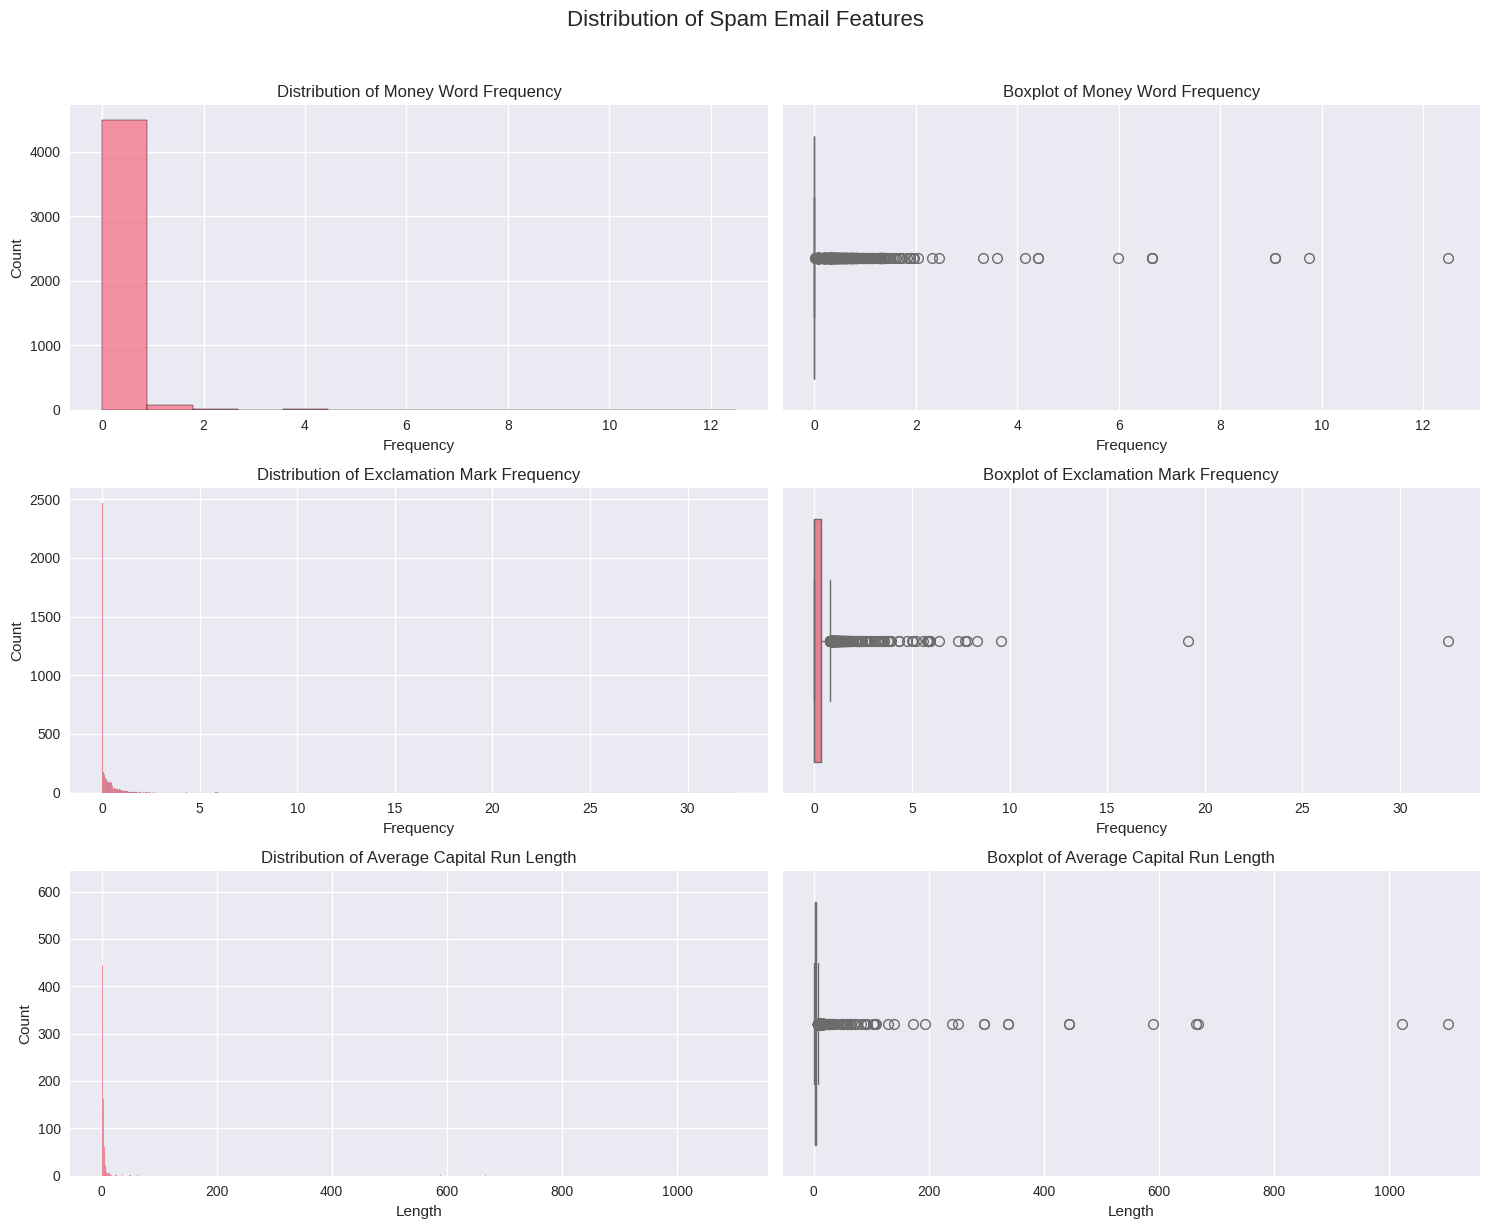

In [33]:

plt.style.use('seaborn')
sns.set_palette("husl")

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Distribution of Spam Email Features', size=16, y=1.02)

# 1. word_freq_money
sns.histplot(data=df, x='word_freq_money:', ax=axes[0,0])
axes[0,0].set_title('Distribution of Money Word Frequency')
axes[0,0].set_xlabel('Frequency')

sns.boxplot(data=df, x='word_freq_money:', ax=axes[0,1])
axes[0,1].set_title('Boxplot of Money Word Frequency')
axes[0,1].set_xlabel('Frequency')

# 2. char_freq_!的分布
sns.histplot(data=df, x='char_freq_!:', ax=axes[1,0])
axes[1,0].set_title('Distribution of Exclamation Mark Frequency')
axes[1,0].set_xlabel('Frequency')

sns.boxplot(data=df, x='char_freq_!:', ax=axes[1,1])
axes[1,1].set_title('Boxplot of Exclamation Mark Frequency')
axes[1,1].set_xlabel('Frequency')

# 3. capital_run_length_average
sns.histplot(data=df, x='capital_run_length_average:', ax=axes[2,0])
axes[2,0].set_title('Distribution of Average Capital Run Length')
axes[2,0].set_xlabel('Length')


sns.boxplot(data=df, x='capital_run_length_average:', ax=axes[2,1])
axes[2,1].set_title('Boxplot of Average Capital Run Length')
axes[2,1].set_xlabel('Length')

# layout
plt.tight_layout()
plt.show()

###4.Choose one model from Part A Question 4. Split the data into training and test subsets.  Build a model with the three variables in the dataset that you think will be good predictors of "spam". Run the model and evaluate prediction error using k-fold cross-validation. Describe why you chose any particular parameters for your model (e.g., if you used KNN how did you decide to choose a specific value for k).

In [34]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# three variables
X = df[['word_freq_money:', 'char_freq_!:', 'capital_run_length_average:']]
y = df['spam']

# split to train and test
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#K-fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define models
model = LogisticRegression(random_state=42, max_iter=1000, C=1.0)

# Cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=kf)

# fit the model
model.fit(X_train_scaled, y_train)

# predict on test
y_pred = model.predict(X_test_scaled)

# Result
print("cross validation scores:", cv_scores)
print("avg cross validation score: {:.3f} (+/- {:.3f})".format(
    cv_scores.mean(), cv_scores.std() * 2))


cross validation scores: [0.80434783 0.8138587  0.76630435 0.79619565 0.79891304]
avg cross validation score: 0.796 (+/- 0.032)


Logistic regression is suitable for binary classification problems, therefore I choose it.


Particular parameters:

---
n_splits=5:
Choose 5-fold cross-validation.
In each iteration, 4 parts are used for training and 1 part for validation.
This is a commonly used number of folds, balancing computational cost and evaluation reliability.

shuffle=True:
Randomly shuffle the data before splitting. This helps avoid biases caused by the order of the data. It improves the reliability of the validation.

Using StandardScaler:
This transforms the features to the same scale. This is particularly important because our features have significant differences in scale.

test_size=0.2:
This is the standard split ratio of 80% for training and 20% for testing.
It ensures there is enough data for training while retaining a sufficient amount of test data.


###5. Repeat the previous question but with a different model from Part A Question 4. - Decision Trees

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold

#define model
dt = DecisionTreeClassifier(max_depth=5, random_state=42)

# cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(dt, X_train_scaled, y_train, cv=skf)

print("Decision Tree CV scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

Decision Tree CV scores: [0.85461957 0.83152174 0.85326087 0.84782609 0.84918478]
Mean CV score: 0.8472826086956522


Particular parameters:

---
max_depth=5: Limits thedepth of the tree to prevent overfitting.

random_state=42: Ensures that the results are reproducible.

###6. Repeat the previous question but with a different model from Part A Question 4.- Random Forests

In [36]:
from sklearn.ensemble import RandomForestClassifier

# define model
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# cross validation
cv_scores = cross_val_score(rf, X_train_scaled, y_train, cv=skf)

print("Random Forest CV scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

Random Forest CV scores: [0.86141304 0.84918478 0.85733696 0.84782609 0.85326087]
Mean CV score: 0.853804347826087


Particular parameters:


---


n_estimators=100: Uses 100 trees.

max_depth=5: Limits the depth of each tree.


###7. Repeat the previous question but with a different model from Part A Question 4. -KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier

# define model
knn = KNeighborsClassifier(n_neighbors=5)

# cross-validation
cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=skf)

print("KNN CV scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())


KNN CV scores: [0.83559783 0.82472826 0.8451087  0.84103261 0.83288043]
Mean CV score: 0.8358695652173914


Particular parameters:

---
n_neighbors=5: Selects 5 nearest neighbors.
why using 5? Moderate computational efficiency: Works well for small to medium-sized datasets.
This is a commonly used starting value.


###8. Now rerun all 4 models with 3 additional variables that you think will help the prediction accuracy. Did this cause the performance to improve over your previous models?

In [38]:
df.columns.tolist()

['word_freq_make:',
 'word_freq_address:',
 'word_freq_all:',
 'word_freq_3d:',
 'word_freq_our:',
 'word_freq_over:',
 'word_freq_remove:',
 'word_freq_internet:',
 'word_freq_order:',
 'word_freq_mail:',
 'word_freq_receive:',
 'word_freq_will:',
 'word_freq_people:',
 'word_freq_report:',
 'word_freq_addresses:',
 'word_freq_free:',
 'word_freq_business:',
 'word_freq_email:',
 'word_freq_you:',
 'word_freq_credit:',
 'word_freq_your:',
 'word_freq_font:',
 'word_freq_000:',
 'word_freq_money:',
 'word_freq_hp:',
 'word_freq_hpl:',
 'word_freq_george:',
 'word_freq_650:',
 'word_freq_lab:',
 'word_freq_labs:',
 'word_freq_telnet:',
 'word_freq_857:',
 'word_freq_data:',
 'word_freq_415:',
 'word_freq_85:',
 'word_freq_technology:',
 'word_freq_1999:',
 'word_freq_parts:',
 'word_freq_pm:',
 'word_freq_direct:',
 'word_freq_cs:',
 'word_freq_meeting:',
 'word_freq_original:',
 'word_freq_project:',
 'word_freq_re:',
 'word_freq_edu:',
 'word_freq_table:',
 'word_freq_conference:',
 '

In [39]:

# three new variables
X = df[['word_freq_free:', 'word_freq_credit:', 'char_freq_$:']]
y = df['spam']

#spilt data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 1. logistic regression
lr = LogisticRegression(random_state=42)
lr_scores = cross_val_score(lr, X_train_scaled, y_train, cv=skf)
print("Logistic Regression mean CV score:", lr_scores.mean())

# 2. decision tree
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_scores = cross_val_score(dt, X_train_scaled, y_train, cv=skf)
print("Decision Tree mean CV score:", dt_scores.mean())

# 3. randomforest
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_scores = cross_val_score(rf, X_train_scaled, y_train, cv=skf)
print("Random Forest mean CV score:", rf_scores.mean())

# 4. KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn_scores = cross_val_score(knn, X_train_scaled, y_train, cv=skf)
print("KNN mean CV score:", knn_scores.mean())

Logistic Regression mean CV score: 0.8236413043478261
Decision Tree mean CV score: 0.8432065217391305
Random Forest mean CV score: 0.847554347826087
KNN mean CV score: 0.8478260869565217



*   Logistic Regression: +0.029(significant improvement)
*   Decision Tree: -0.004(No significant improvement)
*   Random Forest: -0.006(No significant improvement)
*   KNN: +0.012(Slight improvement:)

###9.What is a variable that isn't available in this dataset but you think could increase your final model's predictive power if you had it? Why do you think it would improve your model?

I beleive there is a potential using "Attachment Information" to increase model's predictive power, since abnormally large attachments may indicate malware, and abnormally small executable files are often suspicious. Usually standard business doc. fall within a certain size range.